## Analyzing video game data

(Able to do analysis on what affects critic score and sales)

* 1.Conduct market trend analysis to understand how games have changed across time (EDA)
* 2.Investigate regional performance (sales) and derive insights as to how world demographics have changed with respect to games (EDA)
* 3.Predict Critic Scores based on game attributes (Use KNN/Regression) (ML)

#Preprocessing steps

In [32]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt2
import seaborn as  sns          


In [2]:
df = pd.read_csv('data/Video_Games.csv')
df.shape


(64016, 14)

In [3]:
df.columns

Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales', 'release_date', 'last_update'],
      dtype='object')

Column names are:
* Img
* Title
* Console
* Genre
* Publisher
* Developer
* Critic_score
* Total_sales
* NA_sales
* JP_sales
* PAL_sales
* Other_sales
* Release_date
* Last_update

In [4]:
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [5]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
df.isnull().sum()

number of duplicate rows:  (0, 14)


img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

Dataset has missing values but no duplicate values, what do we do with missing values?
* Since it is NUMERICAL total sales data can simply use mean or median to fill if it's recording error

OR

* Use predictive imputation (most likely not this) 

Use KNN imputation (KNNImputer) to fill values based on similarities between rows

Use regression imputation, to predict numerical values 

# 1. Conduct market trend analysis to understand how games have changed across time (EDA)

In [17]:
market_data = pd.DataFrame({'title' : df['title'],
                            'console' : df['console'],
                            'genre' : df['genre'],
                            'publisher' : df['publisher'],
                            'developer' : df['developer'],
                            'release_date' : df['release_date'],
                            'total_sales': df['total_sales'],
                            })

market_data

,title,console,genre,publisher,developer,release_date,total_sales
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,2013-09-17,20.32
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,2014-11-18,19.39
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,2002-10-28,16.15
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,2013-09-17,15.86
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,2015-11-06,15.09
...,...,...,...,...,...,...,...
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,2016-08-11,NaN
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,2020-07-30,NaN
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,2020-07-30,NaN
64014,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,2019-02-28,NaN


In [ ]:
# #first attempt
# market_data.fillna({'total_sales': market_data['total_sales'].mean()}, inplace=True)

# market_data.dropna(subset=['developer', 'release_date'], inplace=True)
# #second attempt
# mkt_TA = market_data.fillna({'total_sales': market_data['total_sales'].mean()}, inplace=True)

# mkt_ta = mkt_TA.dropna(subset=['developer', 'release_date'], inplace=True)

In [23]:
#cleaned data
market_a = market_data.fillna({'total_sales': market_data['total_sales'].mean()}).dropna(subset=['developer', 'release_date'])
market_a['release_date'] = pd.to_datetime(market_a['release_date'])
market_a


,title,console,genre,publisher,developer,release_date,total_sales
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,2013-09-17,20.320000
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,2014-11-18,19.390000
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,2002-10-28,16.150000
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,2013-09-17,15.860000
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,2015-11-06,15.090000
...,...,...,...,...,...,...,...
64010,World End Syndrome,PS4,Visual Novel,Arc System Works,Arc System Works,2018-04-26,0.349113
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,2016-08-11,0.349113
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,2020-07-30,0.349113
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,2020-07-30,0.349113


In [ ]:
#looking at unique values
market_a.nunique()

title           36878
console            79
genre              20
publisher        3382
developer        7871
release_date     7921
total_sales       483
yearly             51
dtype: int64

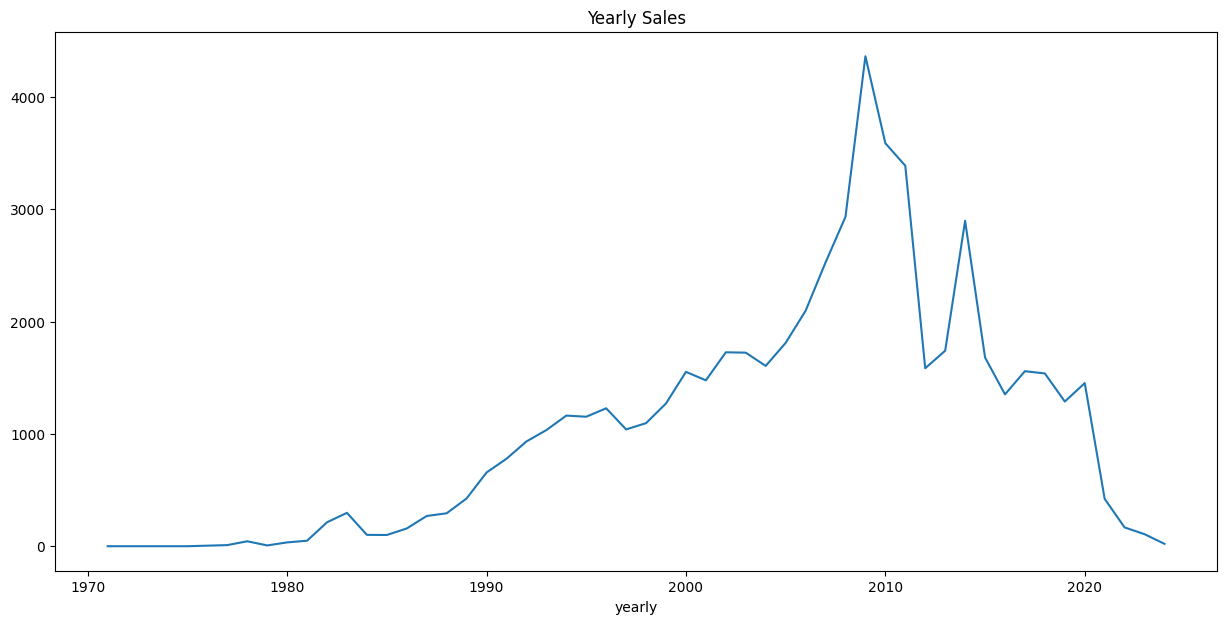

In [35]:
# to check daily sales across the years
market_a['yearly'] = market_a['release_date'].dt.year

market_a['yearly'].value_counts().sort_index().plot(kind='line', title='Yearly Sales')
plt2.rcParams['figure.figsize'] = (14, 6)
plt2.show()

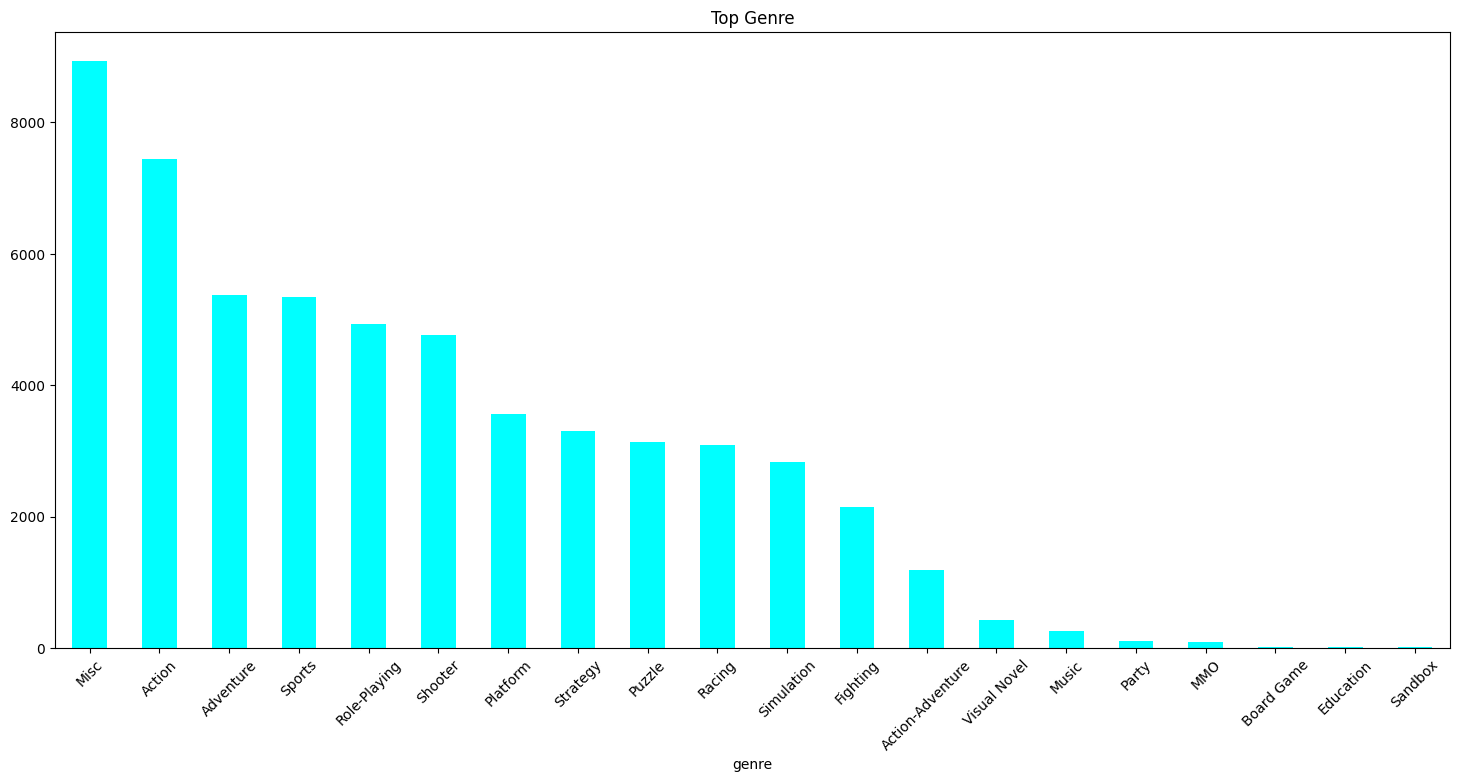

In [58]:
market_a['genre'].value_counts().plot(kind='bar', title='Top Genre', color='cyan')
plt.rcParams['figure.figsize'] = (16, 8)
plt2.xticks(rotation=45) 
plt2.show()

<Axes: xlabel='genre', ylabel='console'>

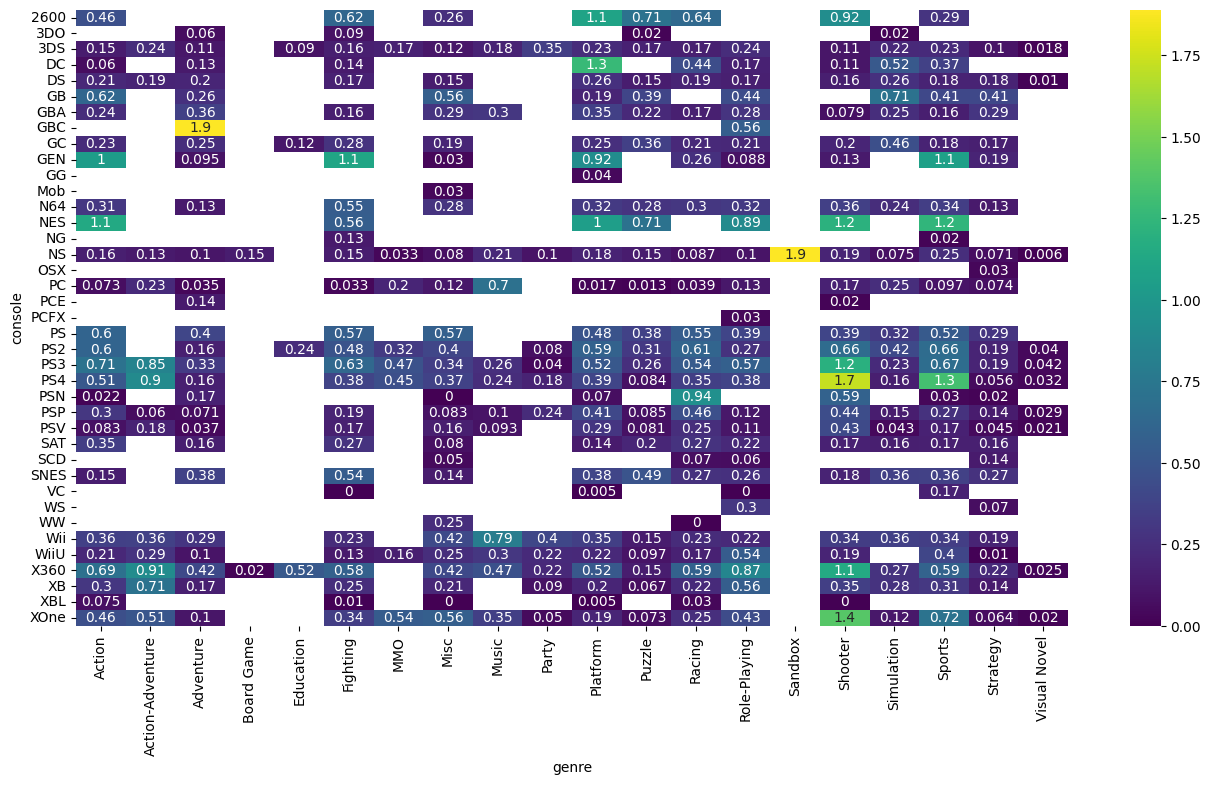

In [65]:
#heat map

sns.heatmap(df.pivot_table(values='total_sales', index='console', columns='genre'), cmap='viridis', annot=True )


## 2. Investigate regional performance (sales) and derive insights as to how world demographics have changed with respect to games (EDA)

In [ ]:
#Using mean to fill up missing SALES values
df.fillna({'total_sales': df['total_sales'].mean(), 
           'na_sales': df['na_sales'].mean()
           'jp_sales': df['na_sales'].mean()
           'pal_sales': df['na_sales'].mean()
           'other_sales': df['na_sales'].mean()
           
           
           }, inplace=True)  # Processing steps


## 3. Predict Critic Scores based on game attributes (Use KNN/Regression) (ML)